# **Classes: Creating Objects**

- Object oriented: data (attributes) and functions (methods) are grouped together

- ### Four Pillars
    - **Encapsulation:** keeps the data and behavior together in one entity
        - While all members of an object may be technically accessible, conventions are used to indicate that certain members are intended to be protected or private

    - **Abstraction:** hide complex logic from the user

    - **Inheritance:** classes can share code between each other (one classes inherits some functionality from another)
        - Also supports multiple inheritance, where one class can inherit from any number of other classes.

    - **Polymorphism:** where an object can take on different forms, objects can be treated similarly

        - For example, how the "+" operator can be used to concat a string object or add together integer objects 

- ### Classes in Python
    - A blueprint for the object

    - The mold or outline for the object we wish to create
    
    - A class itself is not an object

In [26]:
# Tier One: Parent Class

class Pet:
    def __init__(self, age, name: str=None, outside: bool=True):
        self.age = age
        self.name = name
        self.outside = outside

        self._hungry = None

    # Basic setter
    def set_age(self, new_age: float | int):
        if not isinstance(new_age, (float, int)):
            raise TypeError("Age must be type int or float.")

        # What else should we check before setting age?

        self.age = new_age

    # Basic getter
    def get_age(self):
        return self.age

    def is_hungry(self):
        hungry_input = None

        while hungry_input not in ['Yes', 'No']:
            hungry_input = input("Is the animal hungry (Yes or No):")
            try:
                hungry_input = hungry_input.capitalize()
            except AttributeError:
                print("Try again...")

        if hungry_input == 'Yes':
            self._hungry = True
        else:
            self._hungry = False

    def hungry(self):
        if self._hungry is True: print("Please feed the animal!")
        if self._hungry is False: print("The animal is not hungry...")
        
        # A bit of recursion
        if self._hungry is None:
            self.is_hungry() 
            self.hungry()

    # Basic deleter
    def remove_hungry(self):
        del self._hungry

    def define_me(self):
        print("Merriam-Webster animal definition: a domesticated animal kept for pleasure rather than utility")
        return

## super()
- super() is a proxy object, which allows you to invoke the method of an object's parent class (superclass)
- Think of it as a way to quickly grab all the functionality from the parent class
- It is used when inheriting "traits"

In [27]:
# Tier Two: Child Class

class Dog(Pet):
    def __init__(self, shedding: bool, age: float=1e-6, name: str=None, outside: bool=True):
        super().__init__(age, name, outside)
        self.shedding = shedding
        self.age = age
        self.name = name
        self.outside = outside

    # Overriding inherited methods
    def is_hungry(self):
        hungry_input = None

        while hungry_input not in ['Yes', 'No']:
            hungry_input = input(f"Is the dog {self.name} hungry (Yes or No):")
            try:
                hungry_input = hungry_input.capitalize()
            except AttributeError:
                print("Try again...")

        if hungry_input == 'Yes':
            self._hungry = True
        else:
            self._hungry = False

    def hungry(self):
        if self._hungry is True: print(f"Please feed the dog {self.name}!")
        if self._hungry is False: print(f"The dog {self.name} is not hungry...")
        
        # A bit of recursion
        if self._hungry is None:
            self.is_hungry()
            self.hungry()

    def define_me(self):
        super().define_me()
        print("Merriam-Webster dog definition: a carnivorous mammal (Canis familiaris) closely related to the gray wolf that has long been domesticated as a pet, occurs in a variety of sizes, colors, and coat types, and is sometimes trained to perform special tasks")
        return

    def speak(self):
        print("Woof! Woof!")
        return

    def get_shedding(self):
        if self.shedding is True:
            print(f"{self.name} sheds!")
            return
        if self.shedding is False:
            print(f"{self.name} is a non-shedding dog.")
            return

In [28]:
# Tier Three: Grandchild Class

class ShihTzu(Dog):
    def __init__(self, weight: float, shedding: bool, age: float=1e-6, name: str=None, outside: bool=True):
        super().__init__(shedding, age, name, outside)

        self.weight = weight
        self.shedding = shedding
        self.age = age
        self.name = name
        self.outside = outside

    def define_me(self):
        super().define_me()
        print("Merriam-Webster shih tzu definition: any of an old Chinese breed of toy dogs that have a square short unwrinkled muzzle, short muscular legs, and a long dense flowing coat")

    def get_size(self):
        if self.weight < 5:
            print("Just a pup!")
            return
        elif self.weight < 10:
            print("Imperial or still growing!")
            return
        elif self.weight < 18:
            print("Normal, full grown!")
            return
        else:
            print("Overweight!")
            return
    

In [29]:
# Instantiating a Shih Tzu object and testing some methods

shihTzu = ShihTzu(6, False, 4, 'Poppy', True)

shihTzu.define_me()

Merriam-Webster animal definition: a domesticated animal kept for pleasure rather than utility
Merriam-Webster dog definition: a carnivorous mammal (Canis familiaris) closely related to the gray wolf that has long been domesticated as a pet, occurs in a variety of sizes, colors, and coat types, and is sometimes trained to perform special tasks
Merriam-Webster shih tzu definition: any of an old Chinese breed of toy dogs that have a square short unwrinkled muzzle, short muscular legs, and a long dense flowing coat


In [30]:
shihTzu._hungry

In [31]:
shihTzu.hungry()

Please feed the dog Poppy!


In [32]:
shihTzu.get_size()

Imperial or still growing!


In [33]:
# Polymorphism in action

animal = Pet(5, 'Beast', True)
dog = Dog(True, 4, 'Rawr', False)

print('Animal define me: ')
animal.define_me()

print('\nDog define me: ')
dog.define_me()

print('\nShih tzu define me: ')
shihTzu.define_me()

Animal define me: 
Merriam-Webster animal definition: a domesticated animal kept for pleasure rather than utility

Dog define me: 
Merriam-Webster animal definition: a domesticated animal kept for pleasure rather than utility
Merriam-Webster dog definition: a carnivorous mammal (Canis familiaris) closely related to the gray wolf that has long been domesticated as a pet, occurs in a variety of sizes, colors, and coat types, and is sometimes trained to perform special tasks

Shih tzu define me: 
Merriam-Webster animal definition: a domesticated animal kept for pleasure rather than utility
Merriam-Webster dog definition: a carnivorous mammal (Canis familiaris) closely related to the gray wolf that has long been domesticated as a pet, occurs in a variety of sizes, colors, and coat types, and is sometimes trained to perform special tasks
Merriam-Webster shih tzu definition: any of an old Chinese breed of toy dogs that have a square short unwrinkled muzzle, short muscular legs, and a long de

## Dunder Methods aka _'Magic Methods'_

- **_ _ init _ _** method: for initialization is invoked without any call, when an instance of a class is created

- **_ _ repr _ _** method: for string representation

- **_ _ add _ _** method: defines how objects of a class are added together. When "+" is used, the **_ _ add _ _** method defines how that operator is used

- **_ _ truediv _ _** method: defines how objects of a class are true divided (ie 8 / 3 is 2.6666). Allows you to overload the division operator and specify how objects of your custom class should behave when divided

## Application: Decision Trees Algorithm

### Decision Trees
- Machine learning models that try to find patterns in the features of data points

- **Supervised** machine learning models

- Often suffers from overfitting the data

- Super easy to interpret!

- **Information Gain**
    - Measures the difference in the impurity of the data before and after the splitting of the data
- **Gini Impurity**
    - The lower the Gini Impurity the better
    - To find Gini Impurity of a set of data points, it's calculated as $1 - \sum_{k=1}^{K} p_k^2$, where $p_k$ is the proportion of observations belonging to class $k$.
- Types
    - Classification: categorical data
    - Regression: continuous data
### Basic Regression Decision Tree Algorithm
- **#1:** Divide the predictor space, that is the set of possible values for _X1_, _X2_, _X3_, ..., _Xp_ into _J_ distinct and non-overlapping regions, _R1_, _R2_, _R3_, ..., _Rj_
$$ R_1(j, s) = \{X | X_j < s\} $$
$$ R_2(j, s) = \{X | X_j \geq s\} $$

- **#2:** For every observation that falls into the region Rj, we make the same prediction, which is simply the mean of the response values for the training observations in Rj. We are seeking to minimize...
    
$$ \sum_{i: x_i \in R_{1}(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_{2}(j,s)} (y_i - \hat{y}_{R_2})^2 $$

- **#3:** Once we find the split that minimizes the loss function, we recurse, repeating steps **#1** and **#2**. Until, either the max depth parameter has been met or the tree _'perfectly'_ fits the data


In [34]:
# Decision Tree Regressor Class

import random
import numpy as np
import pandas as pd

class CustomDecisionTreeRegressor:
    def __init__(self, split_size: int, split_percentile_step = 5, rss_threshold: float = None, random_state = None, max_depth = None):
        """
        args:
            - split_size: the minimum number of observations allowed in each split
            - rss_threshold: the rss level for each split, can be used to prevent overfitting
            - max_depth: the max number of splits
            - random_state: used to randomize feature selection during each split. When is None we can 
                            use the class to build a tree within the random forest
        """
        
        if not isinstance(split_size, int) or split_size <= 0:
            raise TypeError("split_size must be a positive integer.")
        self.split_size = split_size

        if split_percentile_step <= 0 or (100 % split_percentile_step != 0):
            raise TypeError("split_percentile_step must be a positive integer and factor of 100.")
        self.split_percentile_step = split_percentile_step

        if rss_threshold is not None and not isinstance(rss_threshold, (int, float)):
            raise TypeError("rss_threshold must be a float type or None.")
        self.rss_threshold = rss_threshold

        if random_state is not None and not isinstance(random_state, (int, np.integer)):
            raise TypeError("random_state must be an integer type or None.")
        self.random_state = random_state

        if self.random_state is not None:
            self.rng = np.random.default_rng(self.random_state)
        else:
            self.rng = None

        if max_depth is not None and not isinstance(max_depth, int):
            raise TypeError("max_depth must be an integer type or None.")
        self.max_depth = max_depth

        self.X = None
        self.y = None
        self.tree_ = None
        self.r_squared_ = None

    def _rss(self, y: list) -> float:
        if not y:
            return float('inf')
        y_bar_hat = np.mean(y)
        
        return sum((y_i - y_bar_hat)**2 for y_i in y)
    
    def _split(self, s, X: list):
        """
        Splits the data for a feature on a threshold s
        """

        if not X:
            return [], []

        return [i for i, x_i in enumerate(X) if x_i < s], [i for i, x_i in enumerate(X) if x_i >= s]
    
    def _find_best_split(self, X: dict, y: list):
        """
        Finds the best feature given all possible splits for each feature
        """
        
        feature_lst = list(X.keys())
        m = min(int(np.sqrt(len(feature_lst))), len(feature_lst))
        
        if self.rng is not None:
            m_random_feature_lst = self.rng.choice(feature_lst, size=m, replace=False).tolist()
        else:
            m_random_feature_lst = random.sample(feature_lst, m)

        best_rss = float('inf')
        best_feature = None
        best_s = 0
        best_R1_indices = []
        best_R2_indices = []

        for feature in m_random_feature_lst:

            percentiles = list(range(self.split_percentile_step, 100, self.split_percentile_step))
            split_candidates = np.percentile(X[feature], percentiles)

            for s in split_candidates:
                R1_indices, R2_indices = self._split(s, X[feature])
                y1 = [y[idx] for idx in R1_indices]
                y2 = [y[idx] for idx in R2_indices]
                curr_rss = self._rss(y1) + self._rss(y2)
                if curr_rss <= best_rss:
                    best_rss = curr_rss
                    best_feature = feature
                    best_s = s
                    best_R1_indices = R1_indices
                    best_R2_indices = R2_indices

        return best_rss, best_feature, best_s, best_R1_indices, best_R2_indices
    
    def _build_tree(self, X: dict, y: list, depth=0):
        """
        A recursive implementation to decision tree building
        """

        if not y:
            return 0

        if self.max_depth is not None and depth >= self.max_depth:
            return np.mean(y)
        
        curr_rss = self._rss(y)
        if self.rss_threshold is not None and curr_rss <= self.rss_threshold:
            return np.mean(y)
        
        if len(y) <= self.split_size:
            return np.mean(y)
        
        best_rss, best_feature, best_s, best_R1_indices, best_R2_indices = self._find_best_split(X, y)

        if not best_R1_indices or not best_R2_indices:
            return np.mean(y)

        # If no improvement in RSS, return leaf node
        if self.rss_threshold is not None and curr_rss <= self.rss_threshold:
            return np.mean(y)
        
        # Create subsets for left and right branches
        X_left = {}
        X_right = {}
        
        for feature in X:
            X_left[feature] = [X[feature][i] for i in best_R1_indices]
            X_right[feature] = [X[feature][i] for i in best_R2_indices]
        
        y_left = [y[i] for i in best_R1_indices]
        y_right = [y[i] for i in best_R2_indices]
        
        # Recursively build left and right subtrees
        left_tree = self._build_tree(X_left, y_left, depth + 1)
        right_tree = self._build_tree(X_right, y_right, depth + 1)
        
        # Return the tree node as a dictionary
        return {
            'feature': best_feature,
            'threshold': best_s,
            'left': left_tree,
            'right': right_tree
        }
    
    def _search_tree(self, X: dict, tree=None):
        if tree is None:
            tree = self.tree_

        if not isinstance(tree, dict):
            return tree

        feature_k = tree['feature']
        
        if X[feature_k] < tree['threshold']:
            return self._search_tree(X, tree['left'])
        
        if X[feature_k] >= tree['threshold']:
            return self._search_tree(X, tree['right'])
        
    def _r_squared(self):
        """
        Stores a class attribute
        Scored using R^2, calculated on the (training) data passed to .fit()
        """

        ssr = 0
        sst = 0
        y_bar = np.mean(self.y)

        for i in range(len(self.y)):

            sample = {feature: self.X[feature][i] for feature in self.X}
            y_pred = self._search_tree(sample)

            ssr += (self.y[i] - y_pred) ** 2
            sst += (self.y[i] - y_bar) ** 2

        self.r_squared_ = 1 - ssr / sst

    def fit(self, X: dict, y: list):
        """
        Called to fit the training data to a decision tree
        args
            - X: a dictionary where keys are features and the values are lists of associated values (x)
            - y: a list of values, the index for each y_i is equal to the index for its x_i pairing in x
        """
        self.X = X
        self.y = y
        self.tree_ = self._build_tree(X, y)
        self._r_squared()

    def score(self, X: dict, y: list) -> float:
        """
        Used for testing, X and y would be the test sets
        Scored using R^2
        """
        ssr = 0
        sst = 0
        y_bar = np.mean(y)

        for i in range(len(y)):
            sample = {feature: X[feature][i] for feature in X}
            y_pred = self._search_tree(sample)

            ssr += (y[i] - y_pred) ** 2
            sst += (y[i] - y_bar) ** 2

        return 1 - ssr / sst
    
    def predict(self, X: dict) -> float:
        return self._search_tree(X)

## Application: Random Forest Algorithm

### Random Forests
- Machine learning models that try to find patterns in the features of data points

- **Supervised** machine learning model

- Created to solve the problem over the overfitting of decision trees to the data

- A random forest is harder to interpret than a single decision tree

- An **ensemble** technique; a Random Forest contains many decision trees that all work together to classify a new point, the random forest gives that point to each of its decision trees. Each of the trees reports their classification and the Random Forest returns the most popular classification
    - **Ensemble:** an approach that combines many simple building block models in order to obtain a single and potentially very powerful model

- Creates different trees using a process known as bagging. Everytime a decision tree is made, it is created using a different subset of points in the training set. This way, every tree is different, but all trees will still be created from a portion of the training data

- Random forests provide an improvement over bagged trees by the way of a small tweak that decorrelates the trees. Each time a split in a tree is considered, a random sample of _m_ predictors is chosen as split candidates from the full set of _p_ predictors

- Types
    - Classification: categorical data
    - Regression: continuous data

### Basic Random Forest Regression Algorithm
- **#1:** Bootstrap the dataset with replacement

- **#2:** Create a decision tree of a random subset of variables

- **#3:** Repeat steps **#1** and **#2** n times; where n is the number of trees in the forest

- **#4:** Run the point you with to predict down all n trees, the average results from the forsest is the predicted value given by the Random Forest


In [35]:
# Custom Random Forest Regressor Class

class CustomRandomForestRegressor:
    
    def __init__(self, n_trees: int = 100, split_size: int = 2, split_percentile_step: int = 5, 
                 rss_threshold: float = None, max_depth: int = None, random_state: int = None):
        
        if not isinstance(n_trees, int) or n_trees <= 1:
            raise TypeError("n_trees must be an integer type greater than one.")
        self.n_trees = n_trees

        if not isinstance(split_size, int) or split_size <= 0:
            raise TypeError("split_size must be a positive integer.")
        self.split_size = split_size

        if split_percentile_step <= 0 or (100 % split_percentile_step != 0):
            raise TypeError("split_percentile_step must be a positive integer and factor of 100.")
        self.split_percentile_step = split_percentile_step

        if rss_threshold is not None and not isinstance(rss_threshold, (int, float)):
            raise TypeError("rss_threshold must be a float type or None.")
        self.rss_threshold = rss_threshold

        if max_depth is not None and not isinstance(max_depth, int):
            raise TypeError("max_depth must be an integer type or None.")
        self.max_depth = max_depth

        if random_state is not None and not isinstance(random_state, int):
            raise TypeError("random_state must be an integer type or None.")
        self.random_state = random_state

        self.forest_ = None
        self.rng_ = None
        self.r_squared_ = None

    def _bootstrap(self, X: dict, y: list, rng: np.random.Generator):
        boot_idx = rng.choice(len(y), size=len(y), replace=True)
        y_boot = [y[i] for i in boot_idx]
        X_boot = {feature: [X[feature][i] for i in boot_idx] for feature in X.keys()}
        return X_boot, y_boot

    def _build_forest(self, X: dict, y: list):
        self.rng_ = np.random.default_rng(self.random_state)
        forest = []
        r_squared = 0
        for _ in range(self.n_trees):
            tree_seed = int(self.rng_.integers(0, 2**32-1)) if self.random_state is not None else None
            
            X_boot, y_boot = self._bootstrap(X, y, self.rng_)

            tree = CustomDecisionTreeRegressor(
                split_size=self.split_size,
                split_percentile_step=self.split_percentile_step,
                rss_threshold=self.rss_threshold, 
                max_depth=self.max_depth,
                random_state=tree_seed
            )
            tree.fit(X_boot, y_boot)

            forest.append(tree)
            r_squared += tree.r_squared_

        self.forest_ = forest
        self.r_squared_ = r_squared / self.n_trees

    def fit(self, X: dict, y: list):
        return self._build_forest(X, y)

    def score(self, X: dict, y: list) -> float:
        """
        Used for testing, X and y would be the test sets
        Scored using R^2
        """
        y_pred = self.predict(X)
        
        ssr = 0
        sst = 0
        y_bar = np.mean(y)

        for i in range(len(y)):
            ssr += (y[i] - y_pred[i]) ** 2
            sst += (y[i] - y_bar) ** 2
        
        if sst == 0:
            return 1.0 if ssr == 0 else 0.0
        
        return 1 - ssr / sst

    def predict(self, X: dict):
        return np.mean(tree.predict(X) for tree in self.forest_)

In [36]:
# Loading in Kaggle data to explore with the Decision Tree and Random Forest algorithms

df = pd.read_csv('/Users/henrycosentino/Desktop/Python/Intermediate/Machine Learning/Classification/Students Social Media Addiction.csv')
        
df = df[['Age', 'Gender', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Mental_Health_Score', 'Addicted_Score']]
        
df['affects_academic_performance_dummy'] = 0
df.loc[df['Affects_Academic_Performance'].isin(['Yes']), 'affects_academic_performance_dummy'] = 1
df['gender_dummy'] = 0
df.loc[df['Gender'].isin(['Male']), 'gender_dummy'] = 1

X = df[['Age', 'gender_dummy', 'Avg_Daily_Usage_Hours', 'affects_academic_performance_dummy', 'Mental_Health_Score']].to_dict(orient='list')
y = df['Addicted_Score'].to_list()

train_size = 0.7

rand_train_idx = random.sample(range(len(y)), int(train_size*len(y)))
rand_test_idx = [x for x in range(len(y)) if x not in rand_train_idx]

# Data for custom
y_train = [y[i] for i in rand_train_idx]
y_test = [y[i] for i in rand_test_idx]
X_train = {feature: [X[feature][i] for i in rand_train_idx] for feature in X.keys()}
X_test = {feature: [X[feature][i] for i in rand_test_idx] for feature in X.keys()}

# Data for scikit-learn
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_processed = np.array(y_train).ravel()
y_test_processed = np.array(y_test).ravel()

Starting Monte Carlo Simulation for RF Convergence...
  Completed Monte Carlo run 1/100
  Completed Monte Carlo run 2/100
  Completed Monte Carlo run 3/100
  Completed Monte Carlo run 4/100
  Completed Monte Carlo run 5/100
  Completed Monte Carlo run 6/100
  Completed Monte Carlo run 7/100
  Completed Monte Carlo run 8/100
  Completed Monte Carlo run 9/100
  Completed Monte Carlo run 10/100
  Completed Monte Carlo run 11/100
  Completed Monte Carlo run 12/100
  Completed Monte Carlo run 13/100
  Completed Monte Carlo run 14/100
  Completed Monte Carlo run 15/100
  Completed Monte Carlo run 16/100
  Completed Monte Carlo run 17/100
  Completed Monte Carlo run 18/100
  Completed Monte Carlo run 19/100
  Completed Monte Carlo run 20/100
  Completed Monte Carlo run 21/100
  Completed Monte Carlo run 22/100
  Completed Monte Carlo run 23/100
  Completed Monte Carlo run 24/100
  Completed Monte Carlo run 25/100
  Completed Monte Carlo run 26/100
  Completed Monte Carlo run 27/100
  Complete

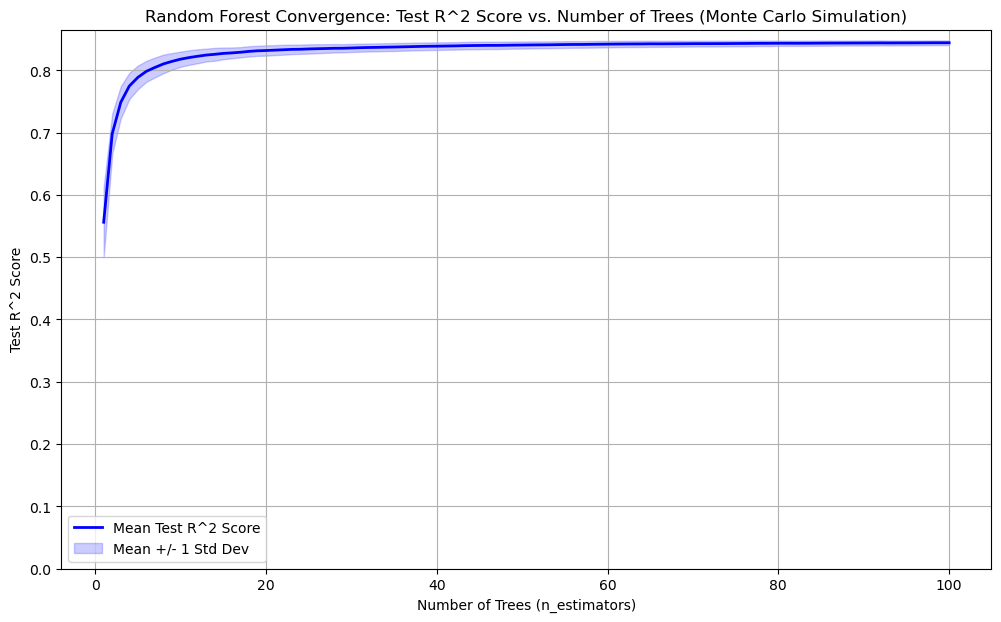

In [37]:
# Visualizing Decision Tree Convergence (Monte Carlo esque simulation)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # Example dataset
from sklearn.metrics import r2_score, mean_squared_error # R^2 for score, MSE for error

# --- 1. Generate or Load Your Data ---
# Replace this with your actual X_train_df, y_train_processed, X_test_df, y_test_processed
X, y = make_regression(n_samples=1000, n_features=10, noise=0.5, random_state=42)
X_train_df, X_test_df, y_train_processed, y_test_processed = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 2. Define Simulation Parameters ---
num_monte_carlo_runs = 100 # How many times to simulate the convergence curve
max_n_trees = 100          # Maximum number of trees in a single Random Forest
step_size = 1              # How often to evaluate the performance (e.g., every 1 tree, or every 5 trees)

# Store scores for each Monte Carlo run
# Using a list of lists or a 2D numpy array is more suitable here
all_test_scores = []

# --- 3. Monte Carlo Simulation Loop ---
print("Starting Monte Carlo Simulation for RF Convergence...")
for i in range(num_monte_carlo_runs):
    # For each Monte Carlo run, we simulate training ONE Random Forest
    # and observe its performance as trees are added.
    # To introduce randomness for each run, we'll vary the random_state slightly.
    # Alternatively, you could resample X_train_df/y_train_processed for each run
    # if you want to simulate different training sets.
    # For now, let's just vary the RF's internal random_state.

    rf_single_run = RandomForestRegressor(
        n_estimators=max_n_trees,  # Train with the max number of trees from the start
        random_state=i,            # Vary random state for each MC run
        oob_score=True,            # Enable OOB score for internal validation (optional for this plot)
        n_jobs=-1                  # Use all available cores for faster training
    )

    rf_single_run.fit(X_train_df, y_train_processed)

    # Now, extract performance at increasing number of trees from this *single* trained forest
    # We'll calculate the R^2 score for prefixes of trees
    test_score_for_this_run = []
    
    # Access the individual trees
    trees = rf_single_run.estimators_

    for n_trees_current in range(1, max_n_trees + 1, step_size):
        # Make predictions using only the first 'n_trees_current' trees
        # This is a bit more manual but correctly simulates the "growth" of the forest.
        
        # Get predictions from the first 'n_trees_current' trees
        # For regression, we average the predictions.
        # For classification, you'd typically take a majority vote or average probabilities.
        
        # Each tree.predict(X_test_df) returns an array of predictions for all test samples
        # Stack them vertically and then average horizontally
        predictions_from_subset_of_trees = np.array([
            tree.predict(X_test_df) for tree in trees[:n_trees_current]
        ]).mean(axis=0) # Average predictions across the selected trees

        # Calculate the R^2 score (or MSE)
        score = r2_score(y_test_processed, predictions_from_subset_of_trees)
        test_score_for_this_run.append(score)
    
    all_test_scores.append(test_score_for_this_run)
    print(f"  Completed Monte Carlo run {i + 1}/{num_monte_carlo_runs}")

print("Monte Carlo Simulation Complete.")

# --- 4. Process and Plot the Results ---

# Convert to a numpy array for easier statistical operations
all_test_scores = np.array(all_test_scores)

# Calculate mean and standard deviation (or percentiles) across runs
mean_scores = np.mean(all_test_scores, axis=0)
std_scores = np.std(all_test_scores, axis=0)
# Optional: calculate percentiles for a confidence band
lower_bound = np.percentile(all_test_scores, 2.5, axis=0)
upper_bound = np.percentile(all_test_scores, 97.5, axis=0)

n_trees_axis = list(range(1, max_n_trees + 1, step_size))

plt.figure(figsize=(12, 7))

# Plot individual Monte Carlo runs (optional, can be noisy if many runs)
# for i in range(num_monte_carlo_runs):
#     plt.plot(n_trees_axis, all_test_scores[i], color='lightgray', alpha=0.3)

# Plot the mean convergence curve
plt.plot(n_trees_axis, mean_scores, color='blue', linewidth=2, label='Mean Test R^2 Score')

# Plot the standard deviation or confidence interval
plt.fill_between(n_trees_axis, mean_scores - std_scores, mean_scores + std_scores,
                 color='blue', alpha=0.2, label='Mean +/- 1 Std Dev')
# Or using percentiles:
# plt.fill_between(n_trees_axis, lower_bound, upper_bound,
#                  color='green', alpha=0.1, label='95% Confidence Interval')


plt.title('Random Forest Convergence: Test R^2 Score vs. Number of Trees (Monte Carlo Simulation)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test R^2 Score')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0) # Ensure y-axis starts at 0 or a reasonable minimum
plt.show()

# You can also analyze the "convergence point" from the mean_scores
# For example, find where the improvement in score becomes negligible

In [38]:
# Displaying model results on Students Social Media Addiction data (Kaggle data set)

df = pd.read_csv('/Users/henrycosentino/Desktop/Python/Intermediate/Machine Learning/Classification/Students Social Media Addiction.csv')
df = df[['Age', 'Gender', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Mental_Health_Score', 'Addicted_Score']]
        
df['affects_academic_performance_dummy'] = 0
df.loc[df['Affects_Academic_Performance'].isin(['Yes']), 'affects_academic_performance_dummy'] = 1
df['gender_dummy'] = 0
df.loc[df['Gender'].isin(['Male']), 'gender_dummy'] = 1

X = df[['Age', 'gender_dummy', 'Avg_Daily_Usage_Hours', 'affects_academic_performance_dummy', 'Mental_Health_Score']].to_dict(orient='list')
y = df['Addicted_Score'].to_list()

train_size = 0.7

rand_train_idx = random.sample(range(len(y)), int(train_size*len(y)))
rand_test_idx = [x for x in range(len(y)) if x not in rand_train_idx]

# Data for custom
y_train = [y[i] for i in rand_train_idx]
y_test = [y[i] for i in rand_test_idx]
X_train = {feature: [X[feature][i] for i in rand_train_idx] for feature in X.keys()}
X_test = {feature: [X[feature][i] for i in rand_test_idx] for feature in X.keys()}

# Data for scikit-learn
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_processed = np.array(y_train).ravel()
y_test_processed = np.array(y_test).ravel()

# Custom Decision Tree Regressor
dtr_custom = CustomDecisionTreeRegressor(split_size=2, random_state=42, max_depth=42)
dtr_custom.fit(X_train, y_train)
print("Custom DTR R^2: ", round(dtr_custom.r_squared_, 4))

# Scikit-learn Decision Tree Regressor
dtr_sk = DecisionTreeRegressor(min_samples_split=2, random_state=42, max_depth=42)
dtr_sk.fit(X_train_df, y_train_processed)
print(f"Scikit-learn DTR R^2: {round(dtr_sk.score(X_train_df, y_train_processed), 4)}")

# Custom Random Forest Regressor
rfr_custom = CustomRandomForestRegressor(n_trees=100, random_state=42, max_depth=42)
rfr_custom.fit(X_train, y_train)
print("Custom RFR R^2: ", round(rfr_custom.r_squared_, 4))

# Scikit-learn Random Forest Regressor
rfr_sk = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=42)
rfr_sk.fit(X_train_df, y_train_processed)
print(f"Scikit-learn RFR R^2: {round(rfr_sk.score(X_train_df, y_train_processed), 4)}")

Custom DTR R^2:  0.8138
Scikit-learn DTR R^2: 0.9904
Custom RFR R^2:  0.9596
Scikit-learn RFR R^2: 0.9844
